### 광고 모델을 소재로 활용했을 때, 소재 효율은 더 증가할까?
모바일 앱을 런칭하면서, 광고 모델을 섭외해 대대적인 오픈 이벤트 캠페인을 기획하게 되었다.  
모델 활용 범위에 광고 소재가 포함되어, 각종 소재에 모델을 넣어 소재를 제작하였다.  
이후 퍼포먼스 마케팅 캠페인을 진행하면서, 소재에 있어 해당 모델의 효과를 확인하고자 하였다.  
테스트는 A/B Test로 진행하며, Paired T-test를 활용해 모델 활용 유무에 대한 클릭률, 전환율의 차이를 검정하고자 한다.


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
df = pd.read_excel('AB 테스트.xlsx', sheet_name = '모델 유무', header = 1, usecols = [i for i in range(1,9)])
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2410 non-null   datetime64[ns]
 1   매체      2410 non-null   object        
 2   그룹      2410 non-null   object        
 3   소재 구분   2410 non-null   int64         
 4   소재명     2410 non-null   object        
 5   노출      2410 non-null   int64         
 6   클릭      2410 non-null   int64         
 7   앱 설치    2410 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 150.8+ KB


None

,날짜,매체,그룹,소재 구분,소재명,노출,클릭,앱 설치
0,2022-10-13,카카오,BR,1,DMKT_NU_Branding_BR_2,92833,1434,5
1,2022-10-13,카카오,BR,1,DMKT_RT_biz_BR_2,0,0,0
2,2022-10-13,몰로코,BR,1,BR_2,1488,8,0
3,2022-10-13,몰로코,BR,1,BR_2,136,1,0
4,2022-10-13,몰로코,BR,1,BR_2,21876,183,11


매체에서 받은 Raw 데이터를 매체, 소재 그룹, 소재 구분(모델 유무), 지표 등으로 전처리하여   

In [12]:
df1 = df.groupby(['날짜', '소재명'])[['노출', '클릭', '앱 설치']].sum()
df1.reset_index(level = ['날짜', '소재명'], inplace = True)
sep = df.groupby(['날짜', '소재명'])['소재 구분'].unique().to_frame().reset_index()
sep['소재 구분'] = sep['소재 구분'].apply(lambda x: 1 if x==[1] else 0)

In [11]:
sep = df.groupby(['날짜', '소재명'])['소재 구분'].unique().to_frame().reset_index()
sep

,날짜,소재명,소재 구분
0,2022-10-13,BR_1,[1]
1,2022-10-13,BR_2,[1]
2,2022-10-13,DMKT_NU_Branding_BR_2,[1]
3,2022-10-13,DMKT_RT_biz_BR_2,[1]
4,2022-10-13,IS_1,[1]
...,...,...,...
278,2022-12-31,BR_1,[1]
279,2022-12-31,BR_1_RE,[0]
280,2022-12-31,BR_2,[1]
281,2022-12-31,BR_2_RE,[0]


In [10]:
df1

In [259]:
df1['클릭률'] = round(df1['클릭']/df1['노출'],4).replace([np.nan, np.inf], 0)
df1['전환율'] = round(df1['앱 설치']/df1['클릭'],4).replace([np.nan, np.inf], 0)

In [260]:
test_df = pd.merge(df1, sep)
test_df.head()

,날짜,소재명,노출,클릭,앱 설치,클릭률,전환율,소재 구분
0,2022-10-13,BR_1,0,0,0,0.0000,0.0000,1
1,2022-10-13,BR_2,72838,1263,52,0.0173,0.0412,1
2,2022-10-13,DMKT_NU_Branding_BR_2,92833,1434,5,0.0154,0.0035,1
3,2022-10-13,DMKT_RT_biz_BR_2,0,0,0,0.0000,0.0000,1
4,2022-10-13,IS_1,0,0,0,0.0000,0.0000,1


In [263]:
click_1 = test_df[test_df['소재 구분']==1]['클릭률'].to_list()
click_0 = test_df[test_df['소재 구분']==0]['클릭률'].to_list()
conv_1 = test_df[test_df['소재 구분']==1]['전환율'].to_list()
conv_0 = test_df[test_df['소재 구분']==0]['전환율'].to_list()

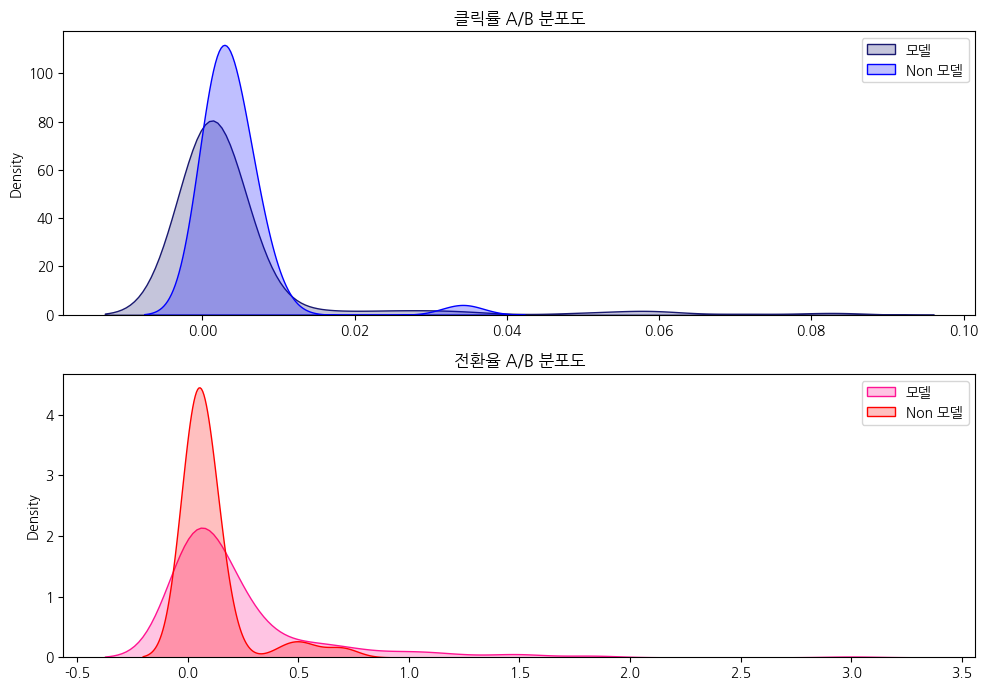

In [264]:
fig = plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.kdeplot(click_1, color='midnightblue', shade=True, label='모델')
sns.kdeplot(click_0, color='blue', shade=True, label='Non 모델')
plt.title('클릭률 A/B 분포도') 
plt.legend()

plt.subplot(2,1,2)
sns.kdeplot(conv_1, color='deeppink', shade=True, label='모델')
sns.kdeplot(conv_0, color='red', shade=True, label='Non 모델')
plt.title('전환율 A/B 분포도')
plt.legend()

plt.tight_layout()

In [265]:
import scipy.stats as stats
from scipy.stats import shapiro

print(shapiro(click_1)) # 데이터 정규성 검정
print(shapiro(click_0)) 

ShapiroResult(statistic=0.38119059801101685, pvalue=3.262657011251925e-28)
ShapiroResult(statistic=0.4904276728630066, pvalue=4.9708775984314e-10)


In [266]:
print('모델 사용 :',len(test_df[test_df['소재 구분']==1]), 
      '\n모델 미사용 :',len(test_df[test_df['소재 구분']==0]))

모델 사용 : 247 
모델 미사용 : 36


In [268]:
from sklearn.utils import resample

sampled_click_0 = resample(click_0, replace=True, n_samples=len(click_1))
sampled_conv_0 = resample(conv_0, replace=True, n_samples=len(conv_1))

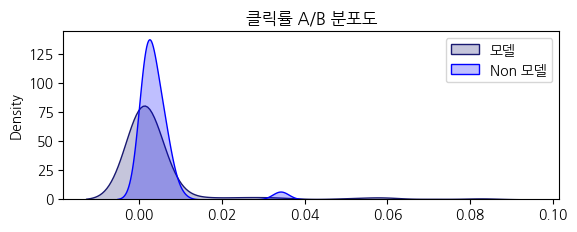

In [269]:
plt.subplot(2,1,1)
sns.kdeplot(click_1, color='midnightblue', shade=True, label='모델')
sns.kdeplot(sampled_click_0, color='blue', shade=True, label='Non 모델')
plt.title('클릭률 A/B 분포도') 
plt.legend()

Text(0.5, 1.0, '모델 미사용')

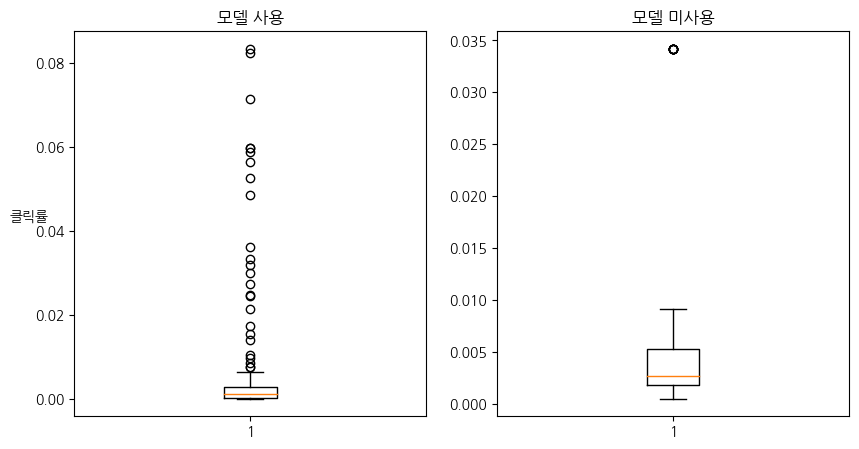

In [316]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].boxplot(click_1)
ax[0].set_title('모델 사용')
ax[0].set_ylabel('클릭률', rotation=0)
ax[1].boxplot(sampled_click_0)
ax[1].set_title('모델 미사용') 

In [271]:
AB_Test = stats.wilcoxon(click_1, sampled_click_0, alternative = 'two-sided')
print(f'양측 검정 결과 : {AB_Test}')

one_AB_Test = stats.wilcoxon(click_1, sampled_click_0, alternative = 'less')
print(f'단측 검정 결과 : {one_AB_Test}')

양측 검정 결과 : WilcoxonResult(statistic=8053.0, pvalue=6.732435568490381e-10)
단측 검정 결과 : WilcoxonResult(statistic=8053.0, pvalue=3.3662177842451907e-10)


In [272]:
print(shapiro(conv_1)) # 데이터 정규성 검정
print(shapiro(conv_0)) 

ShapiroResult(statistic=0.6078830361366272, pvalue=2.282102654689831e-23)
ShapiroResult(statistic=0.5373982191085815, pvalue=1.7300828547561764e-09)


Text(0.5, 1.0, '모델 미사용')

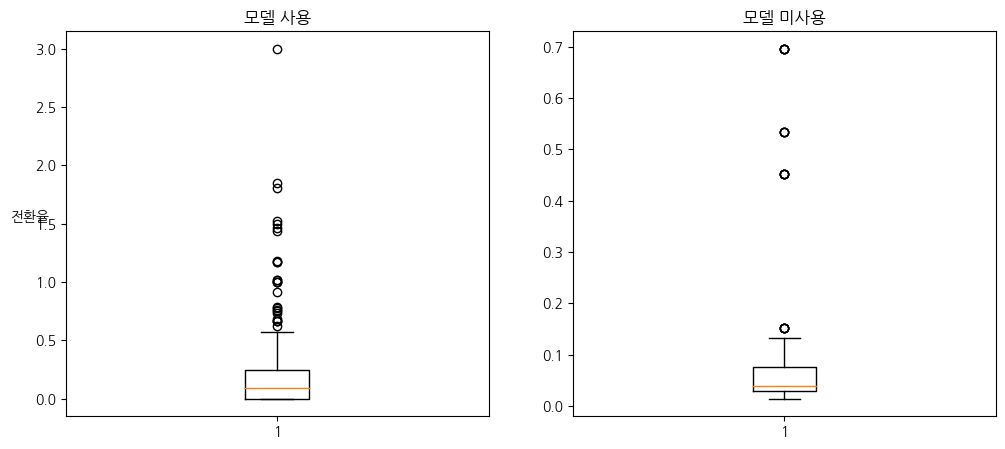

In [273]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].boxplot(conv_1)
ax[0].set_title('모델 사용')
ax[0].set_ylabel('전환율', rotation=0)
ax[1].boxplot(sampled_conv_0)
ax[1].set_title('모델 미사용') 

In [274]:
print(np.mean(conv_1), np.mean(sampled_conv_0))

0.22229757085020244 0.08424129554655871


In [315]:
AB_Test = stats.wilcoxon(conv_1, sampled_conv_0, alternative = 'two-sided')
print(f'양측 검정 결과 : {AB_Test}')

one_ab_test = stats.wilcoxon(sampled_conv_0, conv_1, alternative = 'less')
print(f'단측 검정 결과 : {one_AB_Test}')

양측 검정 결과 : WilcoxonResult(statistic=9783.0, pvalue=8.619267255612093e-07)
단측 검정 결과 : WilcoxonResult(statistic=9783.0, pvalue=4.3096336278060466e-07)


In [311]:
def ab_test(a,b):
    two_s_test = stats.wilcoxon(a, b, alternative = 'two-sided')
    if two_s_test[1] <= 0.05:
        one_s_test = stats.wilcoxon(a, b, alternative = 'greater')
        result = '모델을 사용한 소재와 미사용한 소재의 성과에 차이가 있음'
        direction = '모델을 사용한 소재가 모델을 미사용한 소재보다 성과가 뛰어남'
    else:
        pass
    
    if one_s_test[1] >= 0.05:
        one_s_test = stats.wilcoxon(a,b, alternative = 'less')
        direction = '모델을 사용한 소재가 모델을 미사용한 소재보다 성과가 저조함'
    else:
        pass
    
    print('양측 검정 결과 :', two_s_test, f'\n▷ {result}')
    print('단측 검정 결과 :', one_s_test, f'\n▷ {direction}')

In [313]:
ab_test(click_1, sampled_click_0)

양측 검정 결과 : WilcoxonResult(statistic=8053.0, pvalue=6.732435568490381e-10) 
▷ 모델을 사용한 소재와 미사용한 소재의 성과에 차이가 있음
단측 검정 결과 : WilcoxonResult(statistic=8053.0, pvalue=3.3662177842451907e-10) 
▷ 모델을 사용한 소재가 모델을 미사용한 소재보다 성과가 저조함


In [314]:
ab_test(conv_1, sampled_conv_0)

양측 검정 결과 : WilcoxonResult(statistic=9783.0, pvalue=8.619267255612093e-07) 
▷ 모델을 사용한 소재와 미사용한 소재의 성과에 차이가 있음
단측 검정 결과 : WilcoxonResult(statistic=20845.0, pvalue=4.3096336278060466e-07) 
▷ 모델을 사용한 소재가 모델을 미사용한 소재보다 성과가 뛰어남
